In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mns
%matplotlib inline
import plotly.express as px
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected = True)

In [2]:
melb = pd.read_csv('melb_data.csv')
melb

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


<AxesSubplot:>

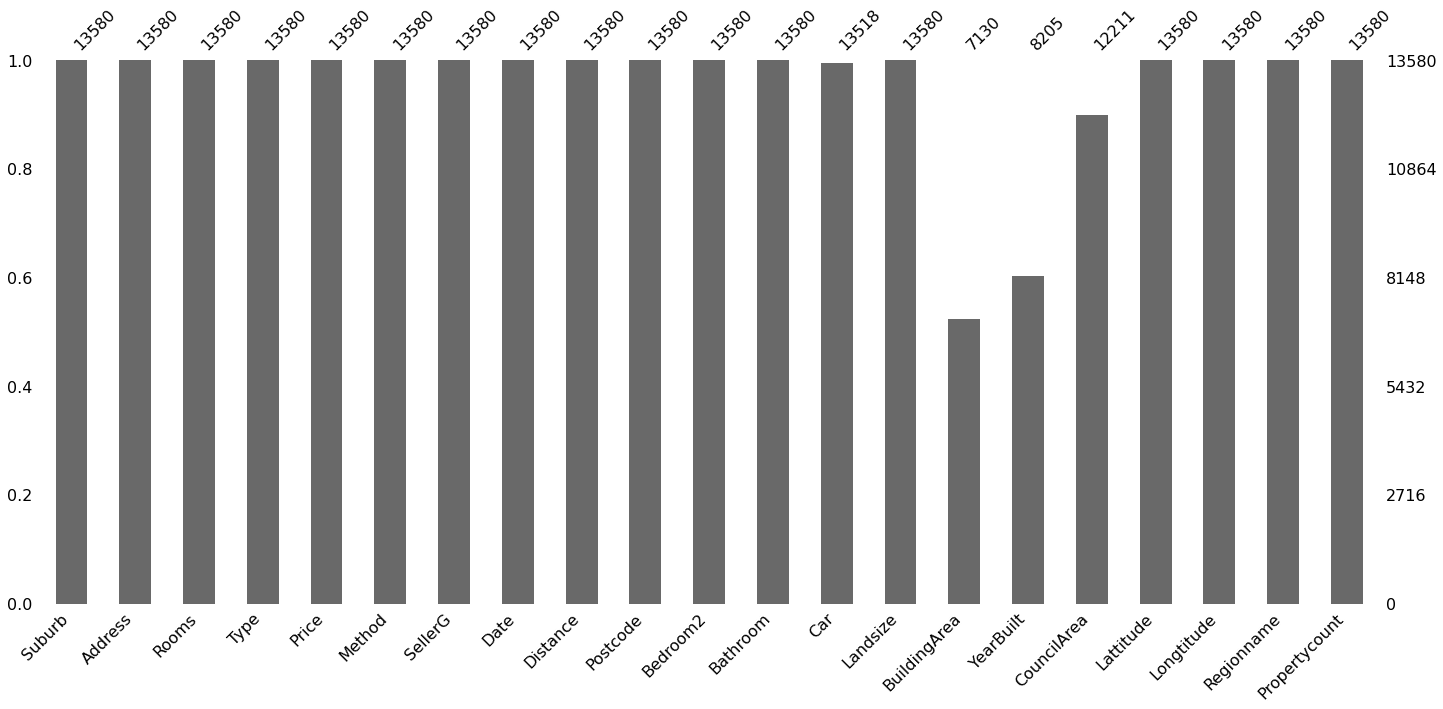

In [3]:
mns.bar(melb)

1: Perform a good cleaning and manipulation on the dataset

In [4]:
melb['BuildingArea'] = melb['BuildingArea'].fillna(np.mean(melb['BuildingArea']))
melb['YearBuilt'] = melb['YearBuilt'].fillna(np.mean(melb['YearBuilt']))
melb['Car'] = melb['YearBuilt'].fillna(np.mean(melb['Car']))
melb['CouncilArea'] = melb['CouncilArea'].fillna(melb['CouncilArea'].mode)

<AxesSubplot:>

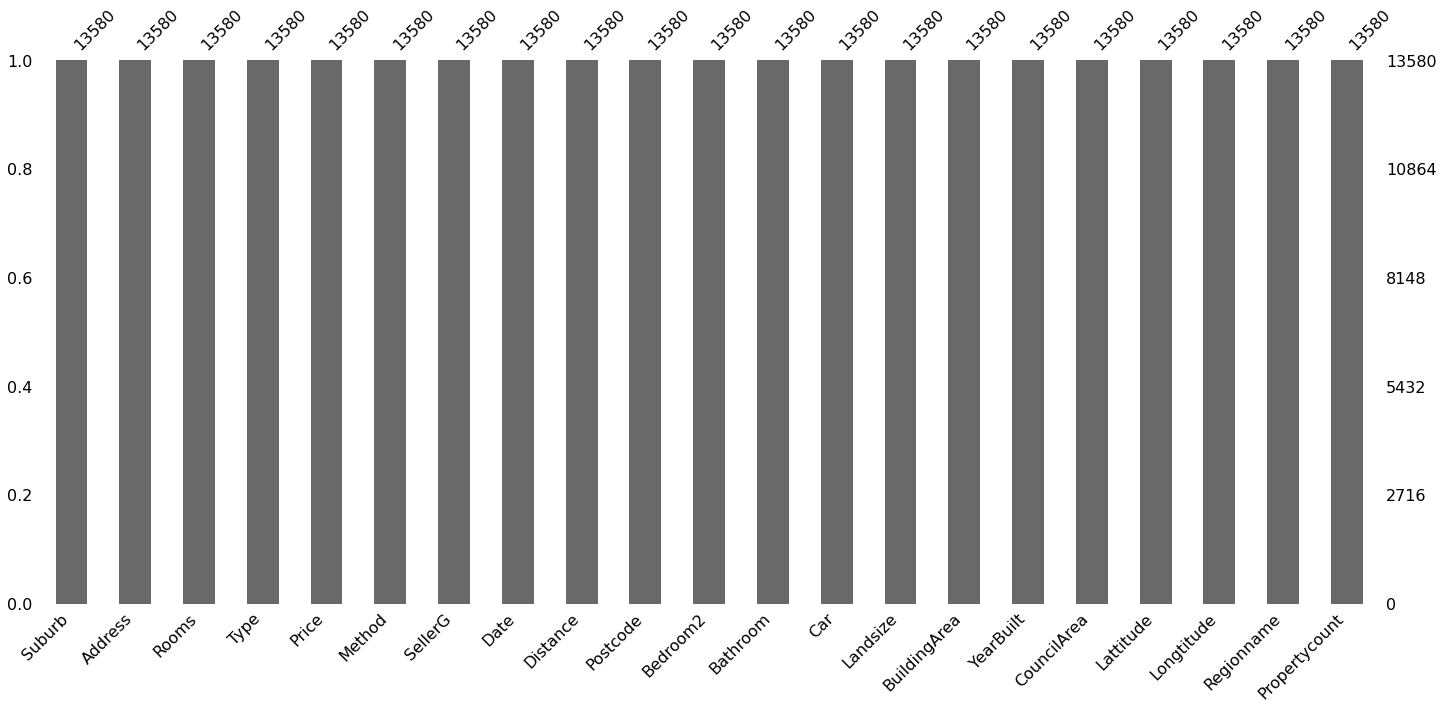

In [5]:
mns.bar(melb)

In [7]:
melb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13580 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   13580 non-null  float64
 15  YearBuilt      13580 non-null  float64
 16  CouncilArea    13580 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

2: a graph showing the distribution of prices across Melbourne

In [12]:
fig = plt.figure(figsize=(20,20))
df = melb['Price']
fig = px.histogram(df, x = 'Price', title = 'DISTRIBUTION OF PRICES ACROSS MELBOURNE')
fig.show()

<Figure size 1440x1440 with 0 Axes>

3: a graph showing the percentage of rooms

In [13]:
rooms_percentage = round(100*melb['Rooms'].value_counts()/len(melb['Rooms']),2)
rooms_percentage

3     43.31
2     26.86
4     19.79
1      5.01
5      4.39
6      0.49
7      0.07
8      0.06
10     0.01
Name: Rooms, dtype: float64

In [14]:
plt.figure(figsize = (20,20))
fig = px.bar(rooms_percentage, y = rooms_percentage, x = rooms_percentage.index, text = rooms_percentage.values,
             color = rooms_percentage.index, labels = {'y': 'INDEX', 'index': 'ROOMS'},
             title = "PERCENTAGE OF ROOMS", color_discrete_sequence = px.colors.sequential.RdBu)
fig.show()

<Figure size 1440x1440 with 0 Axes>

4: a graph showing the Top 30 suburbs of Melbourne

In [16]:
top_t = melb.drop(['Address', 'Rooms', 'Type','Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom',
                 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 
                  'Propertycount'], axis = 1)
top_t

,Suburb,Price
0,Abbotsford,1480000.0
1,Abbotsford,1035000.0
2,Abbotsford,1465000.0
3,Abbotsford,850000.0
4,Abbotsford,1600000.0
...,...,...
13575,Wheelers Hill,1245000.0
13576,Williamstown,1031000.0
13577,Williamstown,1170000.0
13578,Williamstown,2500000.0


In [18]:
top30 = top_t.nlargest(30,['Price'])
top30

,Suburb,Price
12094,Mulgrave,9000000.0
7692,Canterbury,8000000.0
9575,Hawthorn,7650000.0
3616,Kew,6500000.0
12557,Middle Park,6400000.0
6372,Toorak,6250000.0
7554,Brighton,5800000.0
5631,South Yarra,5700000.0
9233,Middle Park,5600000.0
251,Armadale,5525000.0


In [19]:
fig = px.bar(top30, y = 'Price', x = 'Suburb', text = 'Price', color = top30.Suburb,
             labels = {'y' : 'PRICES OF SUBURBS', 'index':'SUBURBS'}, title = 'TOP THIRTY SUBURBS IN MELBOURNE',
             color_discrete_sequence = px.colors.sequential.RdBu)
fig.show()

5: Plot a graph showing the Distribution of real estate by districts based on the following feautures: 'Lattitude', 'Longtitude', 'Regionname','Propertycount'

<ipython-input-20-5ddc1e7e36b9>:17: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



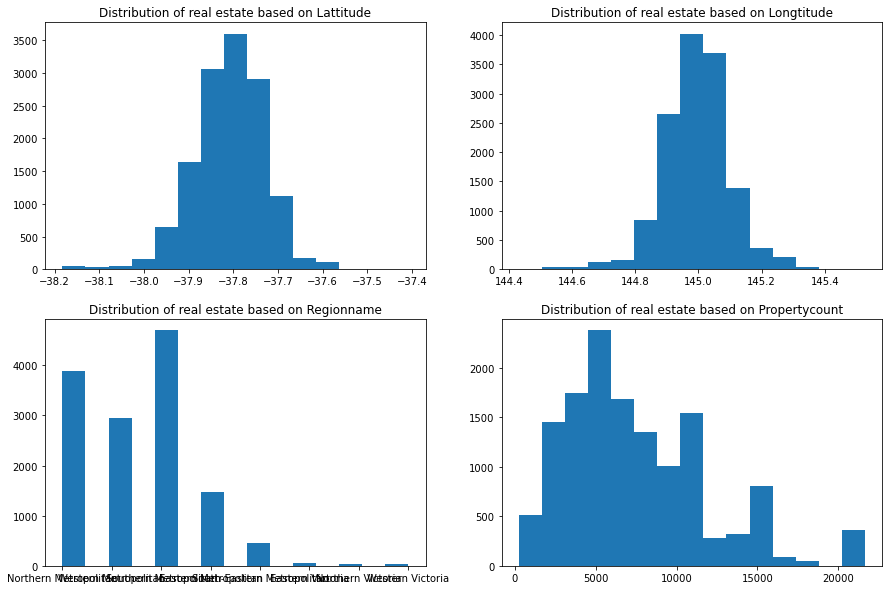

In [20]:
fig = plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
plt.hist(melb['Lattitude'], bins = 15)
plt.title('Distribution of real estate based on Lattitude')

plt.subplot(2,2,2)
plt.hist(melb['Longtitude'], bins = 15)
plt.title('Distribution of real estate based on Longtitude')

plt.subplot(2,2,3)
plt.hist(melb['Regionname'], bins = 15)
plt.title('Distribution of real estate based on Regionname')

plt.subplot(2,2,4)
plt.hist(melb['Propertycount'], bins = 15)
plt.title('Distribution of real estate based on Propertycount')
fig.show()

 6: Plotted Prices for real estate in areas of Melbourne by months and years for 2016 and 2017

In [21]:
melb['Date'] = pd.to_datetime(melb['Date'])
melb['Year']= pd.DatetimeIndex(melb['Date']).year
melb['Month']= pd.DatetimeIndex(melb['Date']).month_name()

In [22]:
melb['Year'].value_counts()

2017    7244
2016    6336
Name: Year, dtype: int64

<ipython-input-25-d492076211ed>:4: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



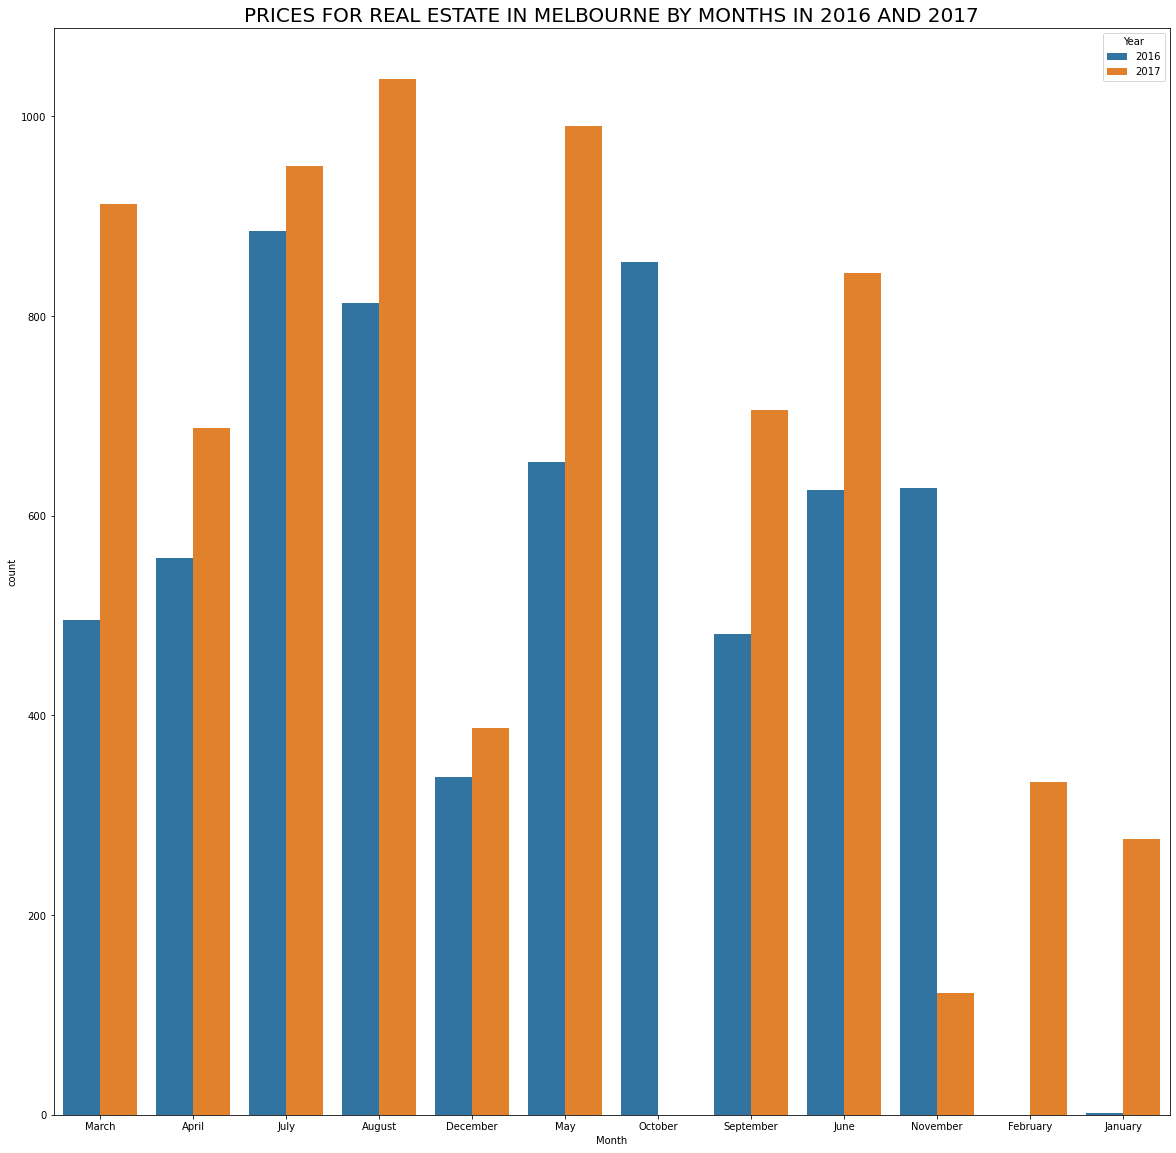

In [25]:
fig = plt.figure(figsize =(20,20))
sns.countplot(x = melb['Month'], hue = melb['Year']).set_title('PRICES FOR REAL ESTATE IN MELBOURNE BY MONTHS IN 2016 AND 2017',
                                                                color = 'black', fontsize = 20)
fig.show()

7: predict the dataset to check how the independents variable affect the dependent variable and the prediction score should be from 0.78 upward

In [28]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

In [29]:
melb['Suburb'] = pd.Series(lab_enc.fit_transform(melb['Suburb']))
melb['Address'] = pd.Series(lab_enc.fit_transform(melb['Address']))
melb['Type'] = pd.Series(lab_enc.fit_transform(melb['Type']))
melb['Method'] = pd.Series(lab_enc.fit_transform(melb['Method']))
melb['SellerG'] = pd.Series(lab_enc.fit_transform(melb['SellerG']))
melb['Regionname'] = pd.Series(lab_enc.fit_transform(melb['Regionname']))
melb['Month'] = pd.Series(lab_enc.fit_transform(melb['Month']))

In [30]:
melb.drop([ 'CouncilArea',], axis = 1, inplace = True)
melb.drop([ 'Date',], axis = 1, inplace = True)

In [32]:
melb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  int32  
 1   Address        13580 non-null  int32  
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  int32  
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  int32  
 6   SellerG        13580 non-null  int32  
 7   Distance       13580 non-null  float64
 8   Postcode       13580 non-null  float64
 9   Bedroom2       13580 non-null  float64
 10  Bathroom       13580 non-null  float64
 11  Car            13580 non-null  float64
 12  Landsize       13580 non-null  float64
 13  BuildingArea   13580 non-null  float64
 14  YearBuilt      13580 non-null  float64
 15  Lattitude      13580 non-null  float64
 16  Longtitude     13580 non-null  float64
 17  Regionname     13580 non-null  int32  
 18  Proper

In [33]:
x = melb.drop('Type', axis = 1)
y = melb['Type']

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)

In [35]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
tree.score(x_test,y_test)

0.8446244477172312

In [38]:
pred = tree.predict(x_test)
pred

array([0, 1, 1, ..., 2, 0, 0])

In [41]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[2591  132  111]
 [ 116  130   74]
 [ 111   89  720]]


              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2834
           1       0.37      0.41      0.39       320
           2       0.80      0.78      0.79       920

    accuracy                           0.84      4074
   macro avg       0.70      0.70      0.70      4074
weighted avg       0.85      0.84      0.85      4074

